#conv

In [1]:
from scipy.signal import convolve2d as conv
import numpy as np


array= np.array([[1,2], [3,4]])


ans = conv(array, array)
print(ans)

[[ 1  4  4]
 [ 6 20 16]
 [ 9 24 16]]


#read_image

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


def plot_images(images):
  row =len(images) 
  col = len(images[0])
  # plt.figure(figsize=((100,800)))

  # plt.figure(figsize = (200,200))
  f, axarr = plt.subplots(col, row , figsize=(15, 15))

  for i in range( col ):
    for j in range( row ):
      # print(images[j ] [ i ])
      # cv2_imshow(images[j ] [ i ])
      axarr[i , j  ].imshow(images[j ] [ i ] ,cmap='gray')


image1 = cv2.imread('/content/drive/MyDrive/ml/assign3/image1.jpeg' ,0)
image2 = cv2.imread('/content/drive/MyDrive/ml/assign3/image2.jpeg' ,0)
image3 = cv2.imread('/content/drive/MyDrive/ml/assign3/image3.jpeg' ,0)

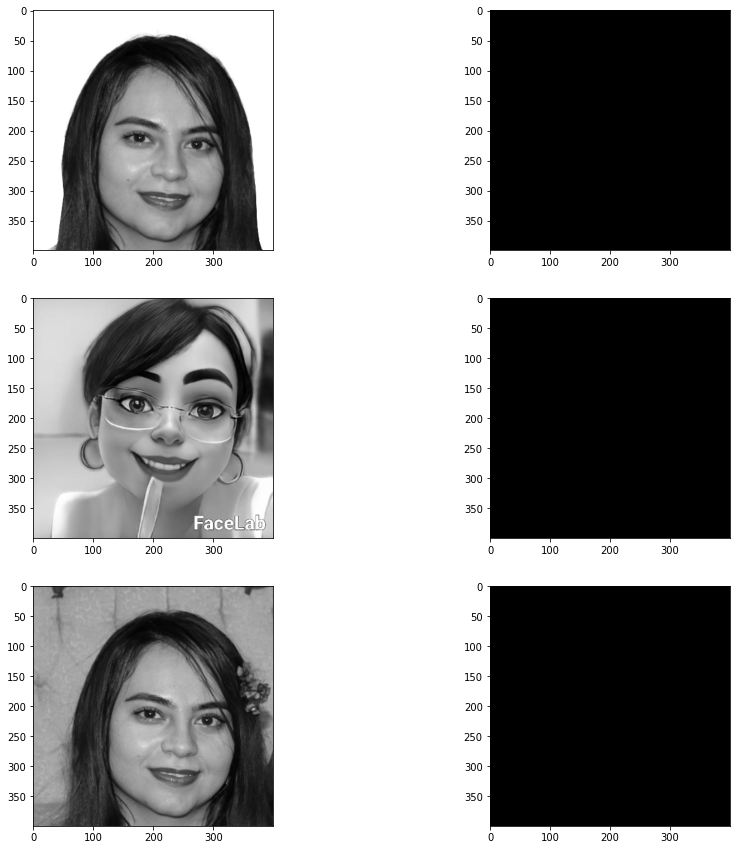

In [ ]:
image1 = cv2.resize(image1, (400, 400))
image2 = cv2.resize(image2, (400, 400))
image3 = cv2.resize(image3, (400, 400))
rows, cols = (2,3)
arr = np.zeros(image1.shape)
images = [[arr]*cols]*rows
images= pd.DataFrame(images)

images.iloc[0,0]=image1
images.iloc[0,1]=image2
images.iloc[0,2]=image3
plot_images(np.array(images))

#gaussian_filter

In [ ]:

def gaussian_filter(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    # res[weak_i, weak_j] = weak
    
    return (res, weak, strong)


     

(0, 0)
(328, 49)
(180, 214)


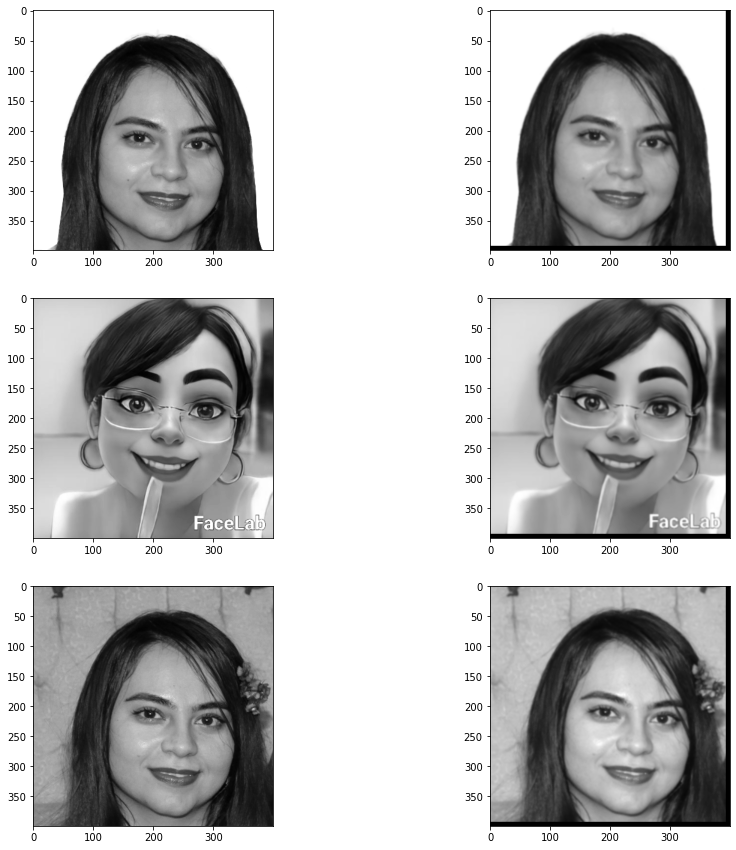

In [ ]:
two_d_gaussian_filter= gaussian_filter(7)


for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-two_d_gaussian_filter.shape[0]):
      for i in range(0,image.shape[1]-two_d_gaussian_filter.shape[1] ):
          y[j,i]=np.sum(two_d_gaussian_filter*image[j:j+ two_d_gaussian_filter.shape[0],i:i+two_d_gaussian_filter.shape[1]] )         
  # cv2_imshow(y)
  images.iloc[1,k]= y 
  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)

plot_images(np.array(images))

#3x3 conv


##vertical_edge_filter

(388, 377)
(379, 294)
(212, 193)


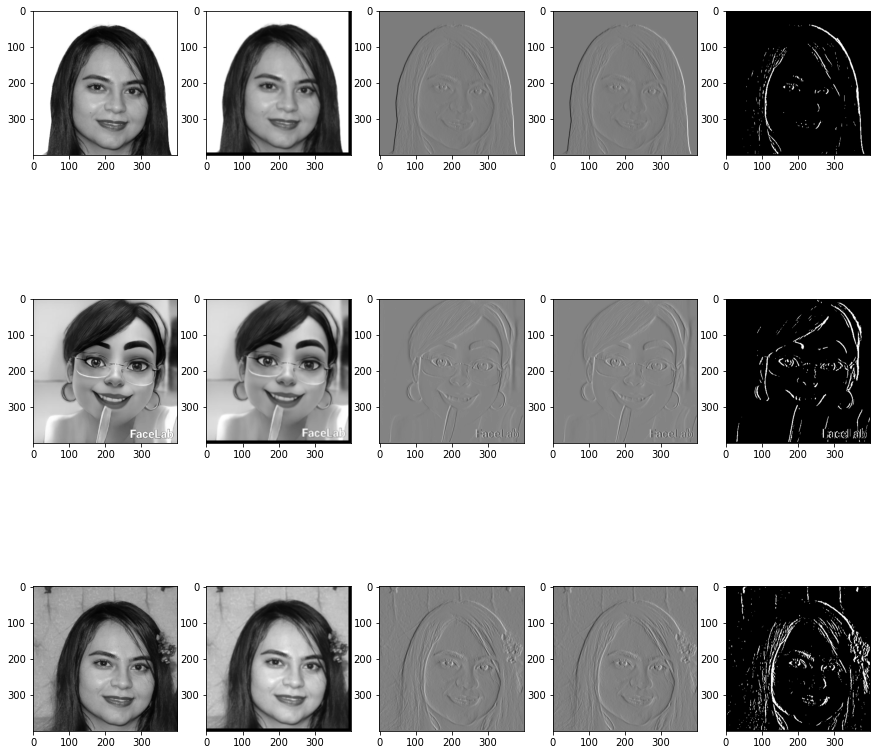

In [ ]:
# 3x3 convolution
vertical_edge_filter =np.array([[-1,0, 1],[-1,0, 1] , [-1,0, 1]])

y=np.zeros(image.shape)
for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-3):
      for i in range(0,image.shape[1]-3):
          y[j,i]=np.sum(vertical_edge_filter*image[j:j+3,i:i+3])         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))

##horizental_edge_filter

(221, 271)
(372, 279)
(202, 366)


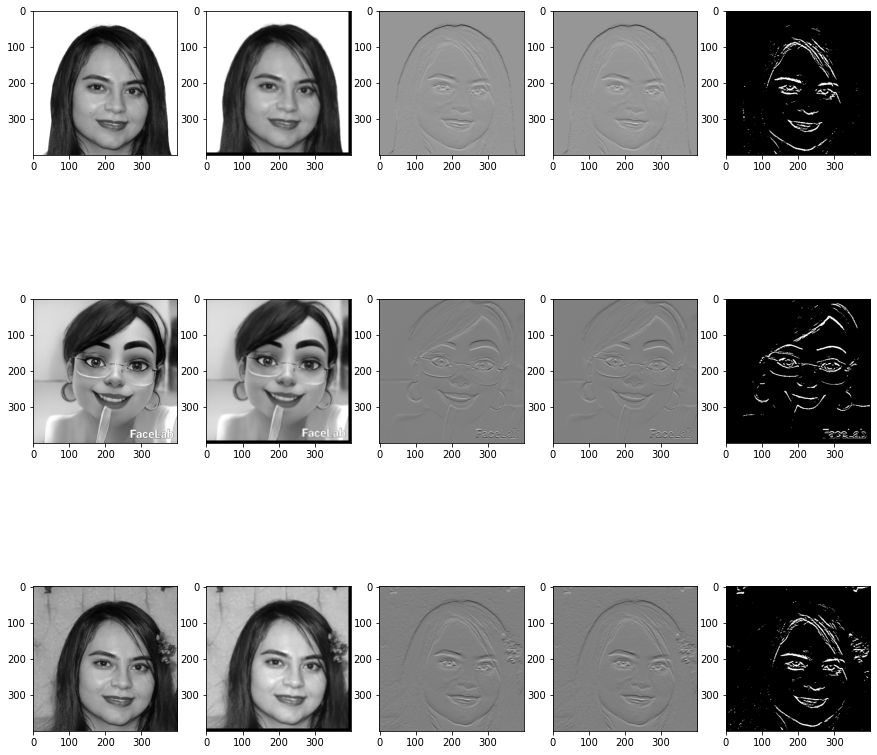

In [ ]:
#3x3 conv
horizental_edge_filter=np.array([[-1,-1 , -1],[0,0,0], [1,1,1]])

# 3x3 convolution

y=np.zeros(image.shape)
for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-3):
      for i in range(0,image.shape[1]-3):
          y[j,i]=np.sum(horizental_edge_filter*image[j:j+3,i:i+3])         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))

##both axis edges

(338, 371)
(372, 279)
(211, 193)


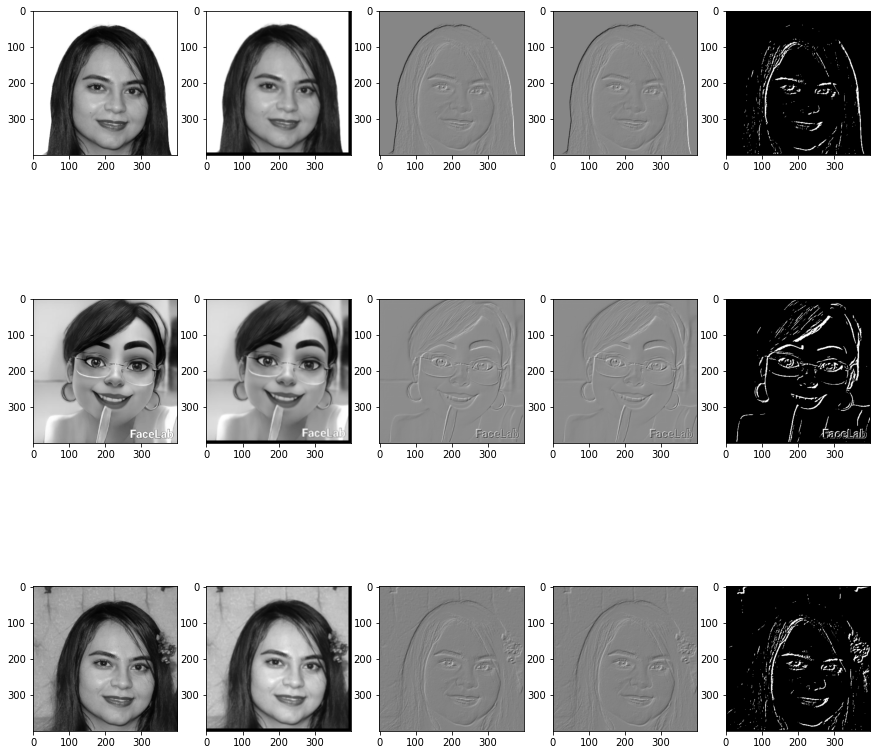

In [ ]:
# 3x3 convolution
horizental_edge_filter =np.array([[-1,0, 1],[-1,0, 1] , [-1,0, 1]])
vertical_edge_filter=np.array([[-1,-1 , -1],[0,0,0], [1,1,1]])


for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-3):
      for i in range(0,image.shape[1]-3):
        y[j,i]=np.sum(horizental_edge_filter*image[j:j+3,i:i+3] + vertical_edge_filter*image[j:j+3,i:i+3] )         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))

#2*2 conv

##vertical_edge_filter

(343, 372)
(375, 368)
(222, 288)


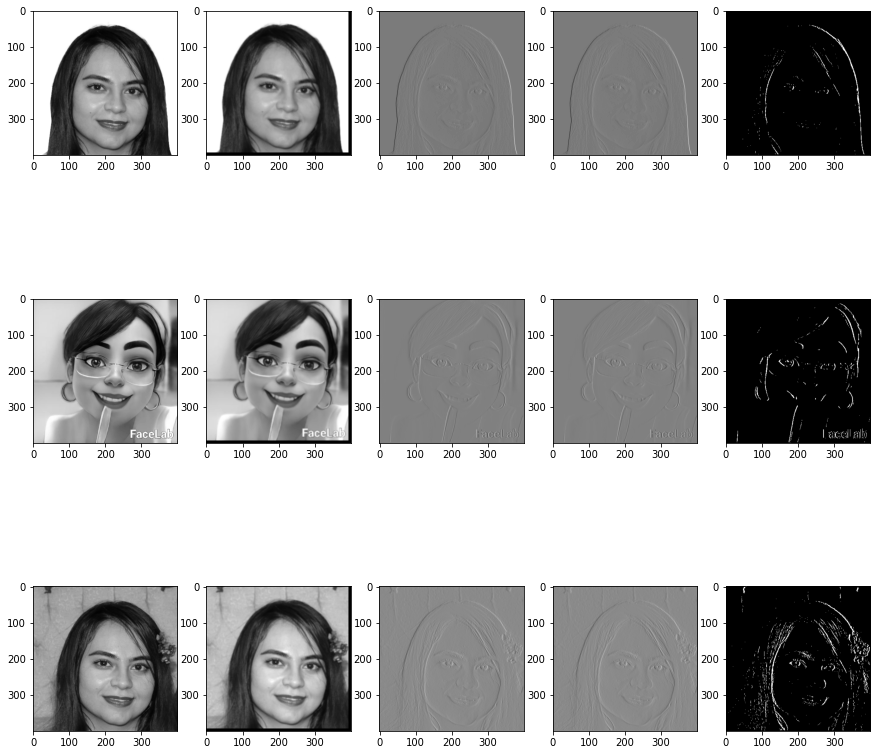

In [ ]:
# 2x2 convolution


vertical_edge_filter =np.array([[-1, 1],[-1, 1] ])

for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-2):
      for i in range(0,image.shape[1]-2):
        y[j,i]=np.sum(vertical_edge_filter*image[j:j+2,i:i+2]  )         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))


##horizental_edge_filter

(211, 177)
(372, 279)
(211, 194)


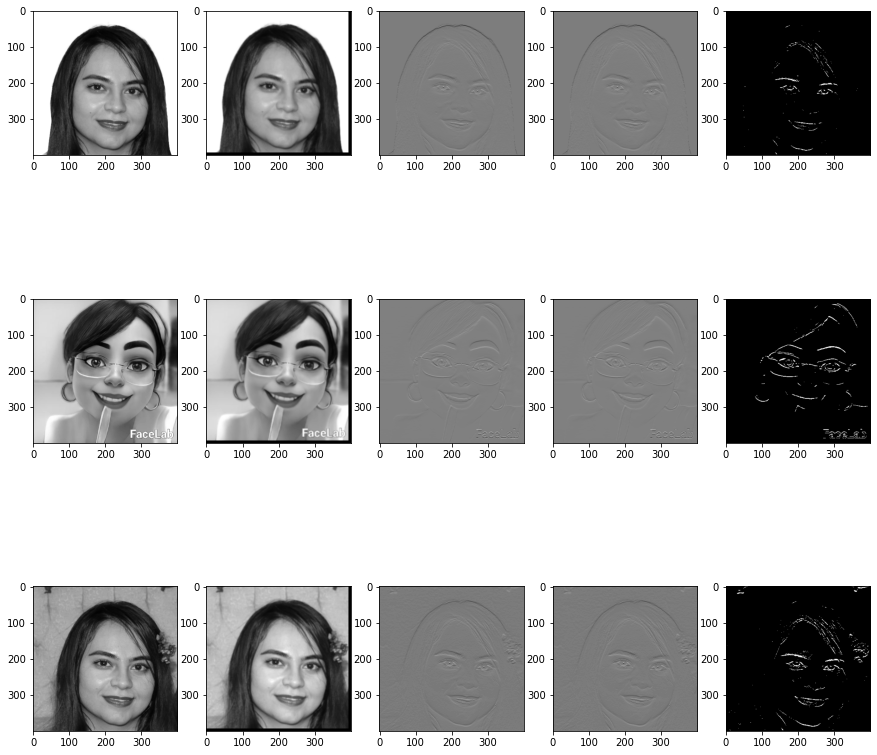

In [ ]:
horizental_edge_filter=np.array([[-1,-1 ] ,[1,1]])

for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-2):
      for i in range(0,image.shape[1]-2):
        y[j,i]=np.sum(vertical_edge_filter*image[j:j+2,i:i+2]  )         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))



##both axis


(343, 372)
(372, 280)
(211, 194)


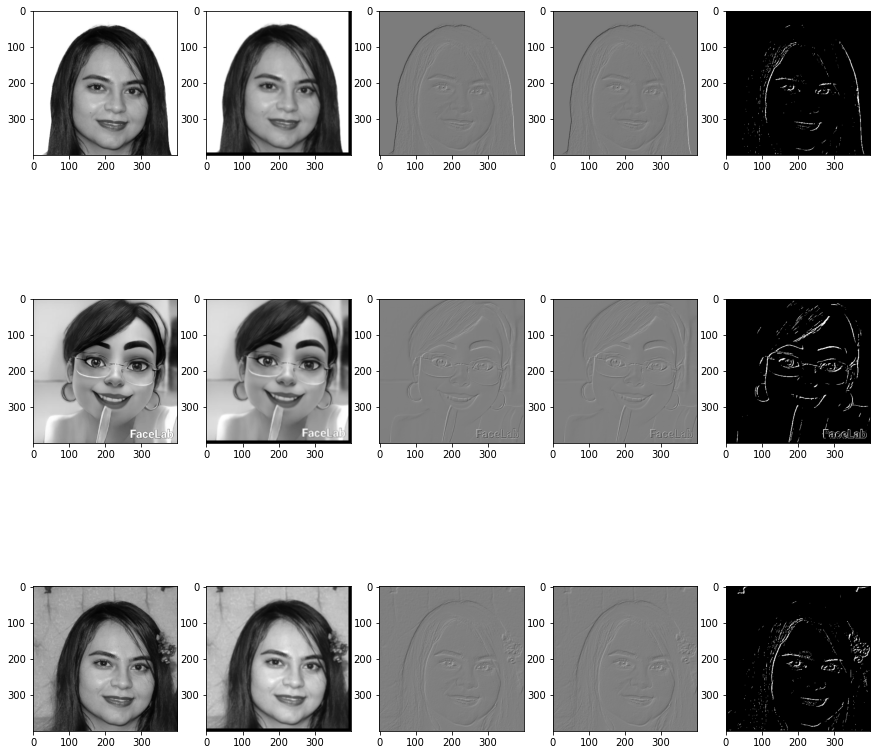

In [ ]:
vertical_edge_filter=np.array([[-1,-1 ], [1,1]])
horizental_edge_filter =np.array([[-1, 1],[-1, 1] ])


for k in range(len(images.iloc[0,:])):
  image = images.iloc[0,k]
  y=np.zeros(image.shape)
  for j in range(0,image.shape[0]-2):
      for i in range(0,image.shape[1]-2):
        y[j,i]=np.sum(vertical_edge_filter*image[j:j+2,i:i+2] + horizental_edge_filter*image[j:j+2,i:i+2] )         
  # cv2_imshow(y)
  images.loc[2,k]=y
  a,b,c = threshold(y)
  # cv2_imshow(a)
  images.loc[3,k]= a

  max_idx=np.argmax(y)
  max_position=np.unravel_index(max_idx, image.shape)
  print(max_position)
  min=np.min(y)
  max=np.max(y)
  diff = max- min
  y = y[: , : ]-min / diff*255
  # cv2_imshow(y)
  images.loc[4,k]= y

plot_images(np.array(images))



#canny edge detector

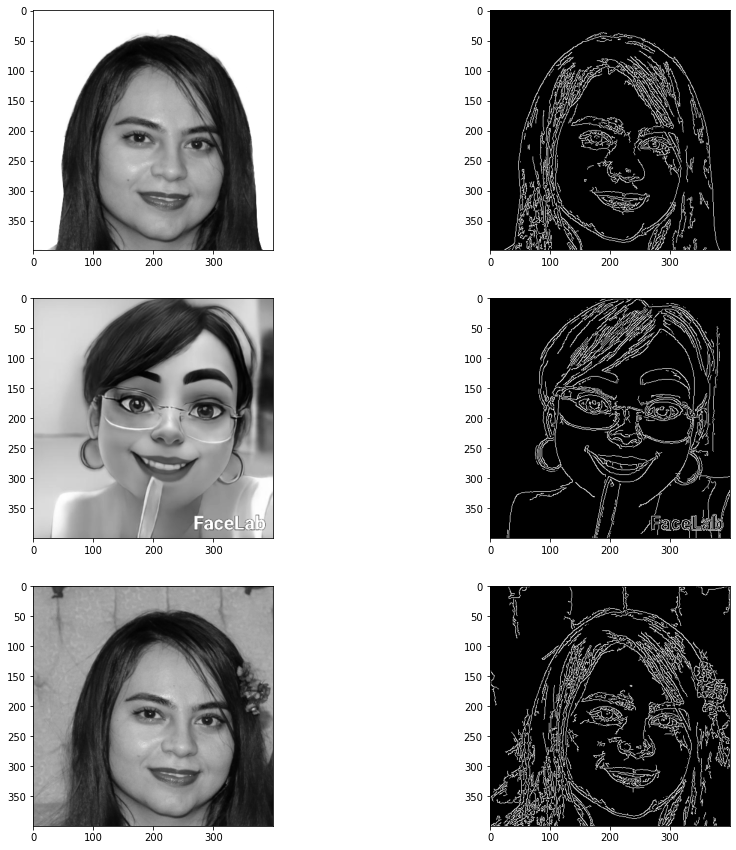

In [ ]:
for i in range(images.shape[1]):
  images.iloc[1, i] =cv2.Canny(images.iloc[0, i], 30, 100)
plot_images(np.array(images))